## Fastai CNN model predictions

Code from [this](https://github.com/falkolav/cell-counter) repository.

*Check [this](https://docs.fast.ai/tutorial.vision.html) tutorial for more insight into the used fastai machine learning module*

### Zero step: check executable options. Example:

In [172]:
!python3 ./data/randomizer.py -h

usage: randomizer.py [-h] -input_dir --Input-directory -test_dir
                     --Test-directory -train_dir --Train-directory
                     [-perc --Percentage] [-seed --Seed]

Split images into train and test datasets

optional arguments:
  -h, --help            show this help message and exit
  -perc --Percentage    Percentage of images to be allocated in test directory
                        (default: 0.2)
  -seed --Seed          Seed to ensure splitting reproducibility (default: 1)

required arguments:
  -input_dir --Input-directory
                        Directory where images to be splitted are. It must
                        contain only images (default: None)
  -test_dir --Test-directory
                        Output test directory (default: None)
  -train_dir --Train-directory
                        Output train directory (default: None)


### First step: split dataset in test and training

In [31]:
!python3 ./data/randomizer.py -input_dir ./data/2021-10-05_fluo+2021-08-06_fluo+2021_10_05_fluo+backgrounds/ -test_dir ./data/test -train_dir ./data/train -seed 2

Directory ./data/2021-10-05_fluo+2021-08-06_fluo+2021_10_05_fluo+backgrounds/ already exists and contains 312 elements
62 images copied in ./data/test directory
250 images copied in ./data/train directory


### Second step: train model 

In [18]:
!python3 ./models/cnn-regressor/cnn_experiment.py --no-cuda --data_folder ./data/ --models_folder cnn-regressor/ --training --epochs 400

/usr/local/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Loading Data
Loading Model
/usr/local/lib/python3.6/site-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")
Starting Training
epoch     train_loss  valid_loss  mae       time    
0         4402.116699 2306.629150 40.257278 00:12                     
Better model found at epoch 0 with valid_loss value: 2306.629150390625.
epoch     train_loss  valid_loss  mae       time    
0         1372.969604 1256.705200 28.013662 00:12                       
Better model found at epoch 0 with valid_loss value: 1256.7052001953125.
1 

87        115.373169  283.662842  12.335039 00:12                       
88        113.593216  425.715698  16.017733 00:12                       
89        107.898438  293.798248  12.829228 00:12                       
90        105.831970  260.226440  11.715177 00:12                       
91        108.764168  408.288971  14.053122 00:12                       
92        110.962410  370.136749  15.407260 00:12                       
93        107.460609  538.899170  16.985052 00:12                       
94        106.032875  314.361206  12.087668 00:12                       
95        124.546211  414.727417  16.142481 00:12                       
96        124.005264  411.182007  16.818926 00:12                       
97        127.207703  264.179382  12.180664 00:12                       
98        121.845818  560.960693  17.989023 00:12                       
99        118.146629  264.103882  11.905173 00:12                        
100       113.489357  439.162659  15.830278 00:12 

198       55.243282   205.474960  10.978586 00:12                       
199       54.843220   242.768829  10.423398 00:12                       
200       52.027279   236.747147  11.310464 00:12                       
201       49.089645   297.434967  10.902666 00:12                       
202       47.338604   230.624741  10.578374 00:12                       
203       44.122105   265.501251  11.245916 00:12                       
204       41.258408   223.565079  11.108481 00:12                       
205       45.651981   379.467926  13.469419 00:12                       
206       44.379776   482.443481  18.311569 00:12                       
207       45.309734   273.308777  11.265569 00:12                       
208       45.535549   871.353760  21.117273 00:12                       
209       45.574711   404.738464  14.759192 00:12                       
210       42.731483   433.677032  16.569622 00:12                       
211       41.970863   247.058395  11.719019 00:12  

308       12.396033   216.630112  11.215140 00:12                       
309       11.969908   234.404739  11.208465 00:12                       
310       11.660065   235.086792  11.469600 00:12                       
311       12.894767   218.543503  11.298958 00:12                       
312       13.125572   225.863007  11.661251 00:12                       
313       12.618750   226.064026  11.291618 00:12                       
314       11.865799   220.908569  11.187351 00:12                       
315       12.195851   224.439819  11.324482 00:12                       
316       12.165193   229.200043  11.288952 00:12                       
317       12.325246   225.053238  11.549725 00:12                       
318       12.128620   225.779434  11.419560 00:12                       
319       12.314989   232.447250  11.396926 00:12                       
320       11.708188   234.689941  11.437479 00:12                       
321       11.226940   227.882950  11.334246 00:12  

### Third step (optional): analyze results on test dataset

Results succesfully saved in /my_data/results


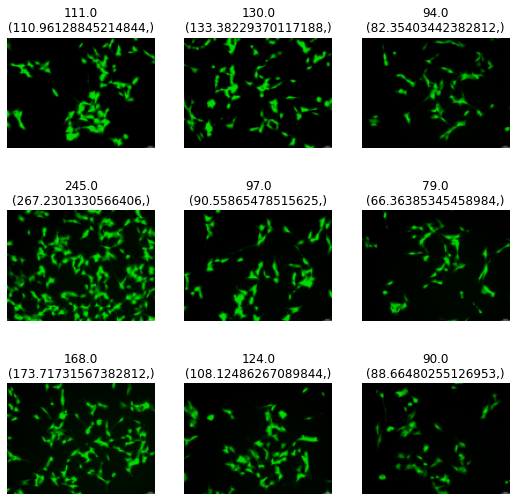

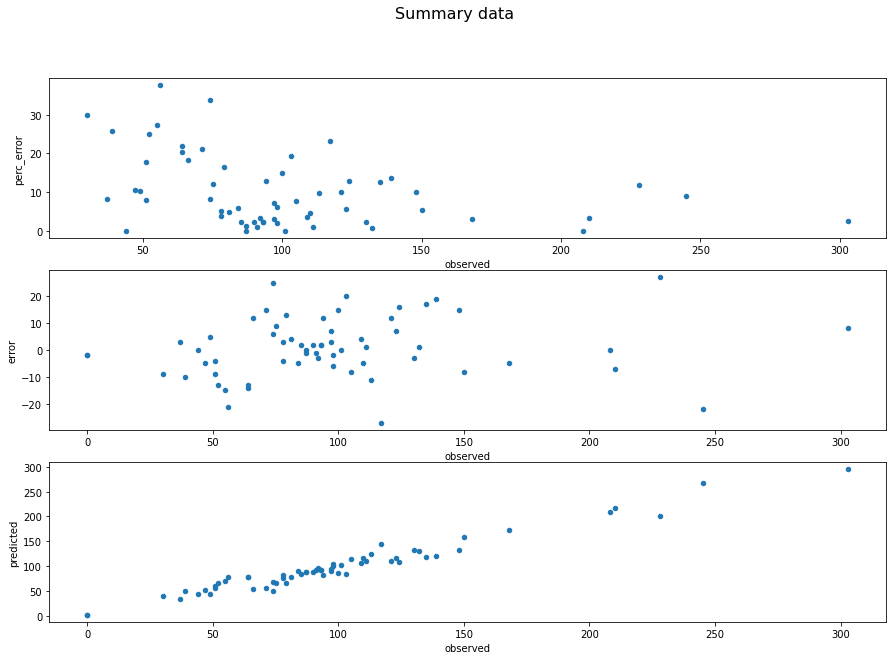

In [22]:
from fastai.vision.all import *
import os
import matplotlib.pyplot as plt
import argparse

def test_analyzer(model_path, test_path, output_dir, resize=128):
    '''Analyzes model performance on test set. Prints test set examples, plots and saves summary data in .xlsx file.'''
    # generate output dir if not an existing path
    if os.path.isdir(output_dir) == False:
        os.makedirs(os.path.join(os.getcwd(), output_dir))
    # function to get label from images
    get_y = lambda x: float(str(x).split('.')[-2])
    # resizes the biggest dimension of an image to max_sz maintaining the aspect ratio
    item_tfms = [RatioResize(resize)]
    # transforms applied to the batches once they are formed (need to be identical to training transformations)
    batch_tfms=[*aug_transforms(mult=0, flip_vert=True, 
                max_rotate=45, min_zoom=0, max_zoom=0, max_warp=0, p_affine=0), 
                Normalize.from_stats(*imagenet_stats)]
    # create model datablocks and dataloader
    blocks = (ImageBlock, RegressionBlock)
    block = DataBlock(blocks=blocks,
                      get_items=get_image_files,
                      get_y=get_y,
                      item_tfms=item_tfms,
                      batch_tfms=batch_tfms)
    dls = block.dataloaders(test_path, bs=32, num_workers=0)
    # create xResNet50
    learn = Learner(dls, xresnet50(pretrained=True, n_out=1), metrics=mae)
    # load pre-trained model weights
    learn.load(f'{os.path.join(os.getcwd(), model_path)}')
    # run predictions
    imgs = get_image_files(test_path)
    # print bunch of images
    learn.show_results()
    # get dataframe output
    listout=[[str(img), int(learn.predict(img)[0][0]), int(str(img).split('.')[-2])] for img in imgs]
    df=pd.DataFrame(listout, columns=['name', 'predicted', 'observed'])
    # add columns
    df['error']=df['observed']-df['predicted']
    df['perc_error']=(df['error'].abs()/df['observed'])*100
    df['abs_error']=df['error'].abs()
    # plot summary results
    f, axs = plt.subplots(3,1, figsize=(15, 10))
    f.suptitle('Summary data', fontsize=16)
    df.plot.scatter(x='observed', y='perc_error', ax=axs[0])
    df.plot.scatter(x='observed', y='error', ax=axs[1])
    df.plot.scatter(x='observed', y='predicted', ax=axs[2])
    # export predictions
    df.to_excel(os.path.join(output_dir, 'Test_results.xlsx'))
    f.savefig(os.path.join(output_dir, 'Very_nice_plots.png'), dpi=300, bbox_inches='tight')
    print(f'Results succesfully saved in {os.path.join(os.getcwd(), output_dir)}')
# run function
test_analyzer('./models/cnn-regressor/results_bs-32_epochs-400_imgsize-128_augmentations-True_pretrained-True/very_nice_model', 'data/test','results')

### Fourth step: run model on custom data

In [24]:
# NB: to use this script change model name to avoid the presence of spaces. (\t->_)
!python3 ./evaluator.py -analysis_path ./data/test/ -output_filename prova -model_path ./models/cnn-regressor/results_bs-32_epochs-400_imgsize-128_augmentations-True_pretrained-True/very_nice_model

/usr/local/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
/usr/local/lib/python3.6/site-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")
+----+----------------------------------------------------------------+-----+
|  0 | data/test/L1A 500nM A_Image002_ch01.85.png                     |  83 |
|  1 | data/test/L1ED 1nM B_Image001_ch01.93.png                      |  91 |
|  2 | data/test/L1ED 1nM C_Image003_ch01.71.png                      |  56 |
|  3 | data/test/L1ED 10pM + R184Q 5uM_Image007_ch01.81.png           |  77 |
|  4 | data/test/L1A 500nM C_Image002_ch01.79.png   